## Имортируем необходимые нам библиотеки и загрузим наши датасеты

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
wine_test = pd.read_csv('Wine_TEST.csv', header=None)
wine_train = pd.read_csv('Wine_TRAIN.csv', header=None)
yoga_test = pd.read_csv('yoga_TEST.csv', header=None)
yoga_train = pd.read_csv('yoga_TRAIN.csv', header=None)

## Изучим датасет с винами

In [16]:
wine_train.head()

,0,1,2,3,4,5,6,7,8,9,...,225,226,227,228,229,230,231,232,233,234
0,1,1.7816,1.6417,1.5139,1.3944,1.2820,1.1747,1.0705,0.97042,0.87394,...,-1.6702,-1.7096,-1.7449,-1.7830,-1.8106,-1.8373,-1.8609,-1.8804,-1.9012,-1.9189
1,1,1.7797,1.6389,1.5120,1.3920,1.2778,1.1704,1.0667,0.96700,0.87141,...,-1.6706,-1.7104,-1.7458,-1.7834,-1.8110,-1.8377,-1.8613,-1.8808,-1.9016,-1.9193
2,1,1.7765,1.6363,1.5083,1.3885,1.2755,1.1666,1.0635,0.96505,0.86839,...,-1.6739,-1.7139,-1.7488,-1.7865,-1.8142,-1.8409,-1.8645,-1.8841,-1.9045,-1.9226
3,1,1.7741,1.6351,1.5079,1.3887,1.2772,1.1716,1.0668,0.96652,0.87209,...,-1.6563,-1.6954,-1.7309,-1.7691,-1.7966,-1.8231,-1.8465,-1.8658,-1.8869,-1.9049
4,1,1.7765,1.6377,1.5109,1.3923,1.2791,1.1726,1.0692,0.97037,0.87466,...,-1.6552,-1.6947,-1.7302,-1.7684,-1.7958,-1.8219,-1.8448,-1.8646,-1.8857,-1.9037


In [17]:
wine_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Columns: 235 entries, 0 to 234
dtypes: float64(234), int64(1)
memory usage: 104.8 KB


In [18]:
num_cols_train = wine_train.shape[1]

column_names = ['target_wine_class']


for i in range(1, num_cols_train):
    column_names.append(f'absorption_{i}')


wine_train.columns = column_names
wine_test.columns = column_names

In [19]:
wine_train.describe()

,target_wine_class,absorption_1,absorption_2,absorption_3,absorption_4,absorption_5,absorption_6,absorption_7,absorption_8,absorption_9,...,absorption_225,absorption_226,absorption_227,absorption_228,absorption_229,absorption_230,absorption_231,absorption_232,absorption_233,absorption_234
count,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,...,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000
mean,1.473684,1.702081,1.566104,1.443165,1.329295,1.222572,1.120528,1.021961,0.927181,0.835331,...,-1.657921,-1.696121,-1.730782,-1.768416,-1.794746,-1.820616,-1.842896,-1.861828,-1.882251,-1.899242
std,0.503745,0.036834,0.034933,0.032844,0.030386,0.027760,0.025301,0.023075,0.021198,0.019437,...,0.014012,0.014325,0.014441,0.014569,0.014932,0.015099,0.015370,0.015547,0.015624,0.015828
min,1.000000,1.656500,1.523800,1.403100,1.293100,1.188800,1.089100,0.992010,0.898060,0.807700,...,-1.701900,-1.740000,-1.774800,-1.811900,-1.838000,-1.864200,-1.886600,-1.905400,-1.925600,-1.942500
25%,1.000000,1.678200,1.544900,1.422200,1.311100,1.204200,1.103500,1.006400,0.912090,0.821260,...,-1.661300,-1.699900,-1.734600,-1.773200,-1.799700,-1.825300,-1.847800,-1.866400,-1.887100,-1.904900
50%,1.000000,1.688200,1.553300,1.431400,1.317700,1.212600,1.111800,1.014300,0.919890,0.829050,...,-1.658200,-1.695700,-1.730400,-1.767500,-1.793500,-1.819400,-1.841100,-1.860100,-1.880300,-1.897300
75%,2.000000,1.715300,1.578700,1.455600,1.340100,1.233000,1.131000,1.031600,0.936820,0.845130,...,-1.650700,-1.689100,-1.723900,-1.761400,-1.787800,-1.813600,-1.835900,-1.855000,-1.874900,-1.891900
max,2.000000,1.781600,1.641700,1.513900,1.394400,1.282000,1.174700,1.070800,0.971740,0.875350,...,-1.629700,-1.667200,-1.701900,-1.738500,-1.763200,-1.789100,-1.810700,-1.829600,-1.849900,-1.865800


In [20]:
wine_train.isna().sum().sum()

np.int64(0)

In [21]:
X_train_wide = wine_train.drop('target_wine_class', axis=1)
y_train = wine_train['target_wine_class']

In [22]:
df_mean_absorption_by_class = wine_train.groupby('target_wine_class')[[col for col in wine_train.columns if col.startswith('absorption_')]].mean()
print("\n--- Средние значения спектрограммы по классам ---")
print(df_mean_absorption_by_class)


--- Средние значения спектрограммы по классам ---
                   absorption_1  absorption_2  absorption_3  absorption_4  \
target_wine_class                                                           
1                      1.703770      1.567763      1.444630      1.330533   
2                      1.700204      1.564259      1.441537      1.327919   

                   absorption_5  absorption_6  absorption_7  absorption_8  \
target_wine_class                                                           
1                      1.223573      1.121393      1.022528      0.927442   
2                      1.221459      1.119567      1.021332      0.926891   

                   absorption_9  absorption_10  ...  absorption_225  \
target_wine_class                               ...                   
1                      0.835493       0.746602  ...       -1.655930   
2                      0.835151       0.746349  ...       -1.660133   

                   absorption_226  absorption_

In [23]:
df_std_absorption_by_class = wine_train.groupby('target_wine_class')[[col for col in wine_train.columns if col.startswith('absorption_')]].std()
print("\n--- Стандартное отклонение спектрограммы по классам ---")
print(df_std_absorption_by_class)


--- Стандартное отклонение спектрограммы по классам ---
                   absorption_1  absorption_2  absorption_3  absorption_4  \
target_wine_class                                                           
1                      0.040902      0.038645       0.03647      0.033630   
2                      0.032392      0.030917       0.02889      0.026896   

                   absorption_5  absorption_6  absorption_7  absorption_8  \
target_wine_class                                                           
1                      0.030495      0.027832      0.025233      0.022916   
2                      0.024901      0.022647      0.020879      0.019544   

                   absorption_9  absorption_10  ...  absorption_225  \
target_wine_class                               ...                   
1                      0.020768       0.018824  ...        0.010801   
2                      0.018236       0.017081  ...        0.016826   

                   absorption_226  absor

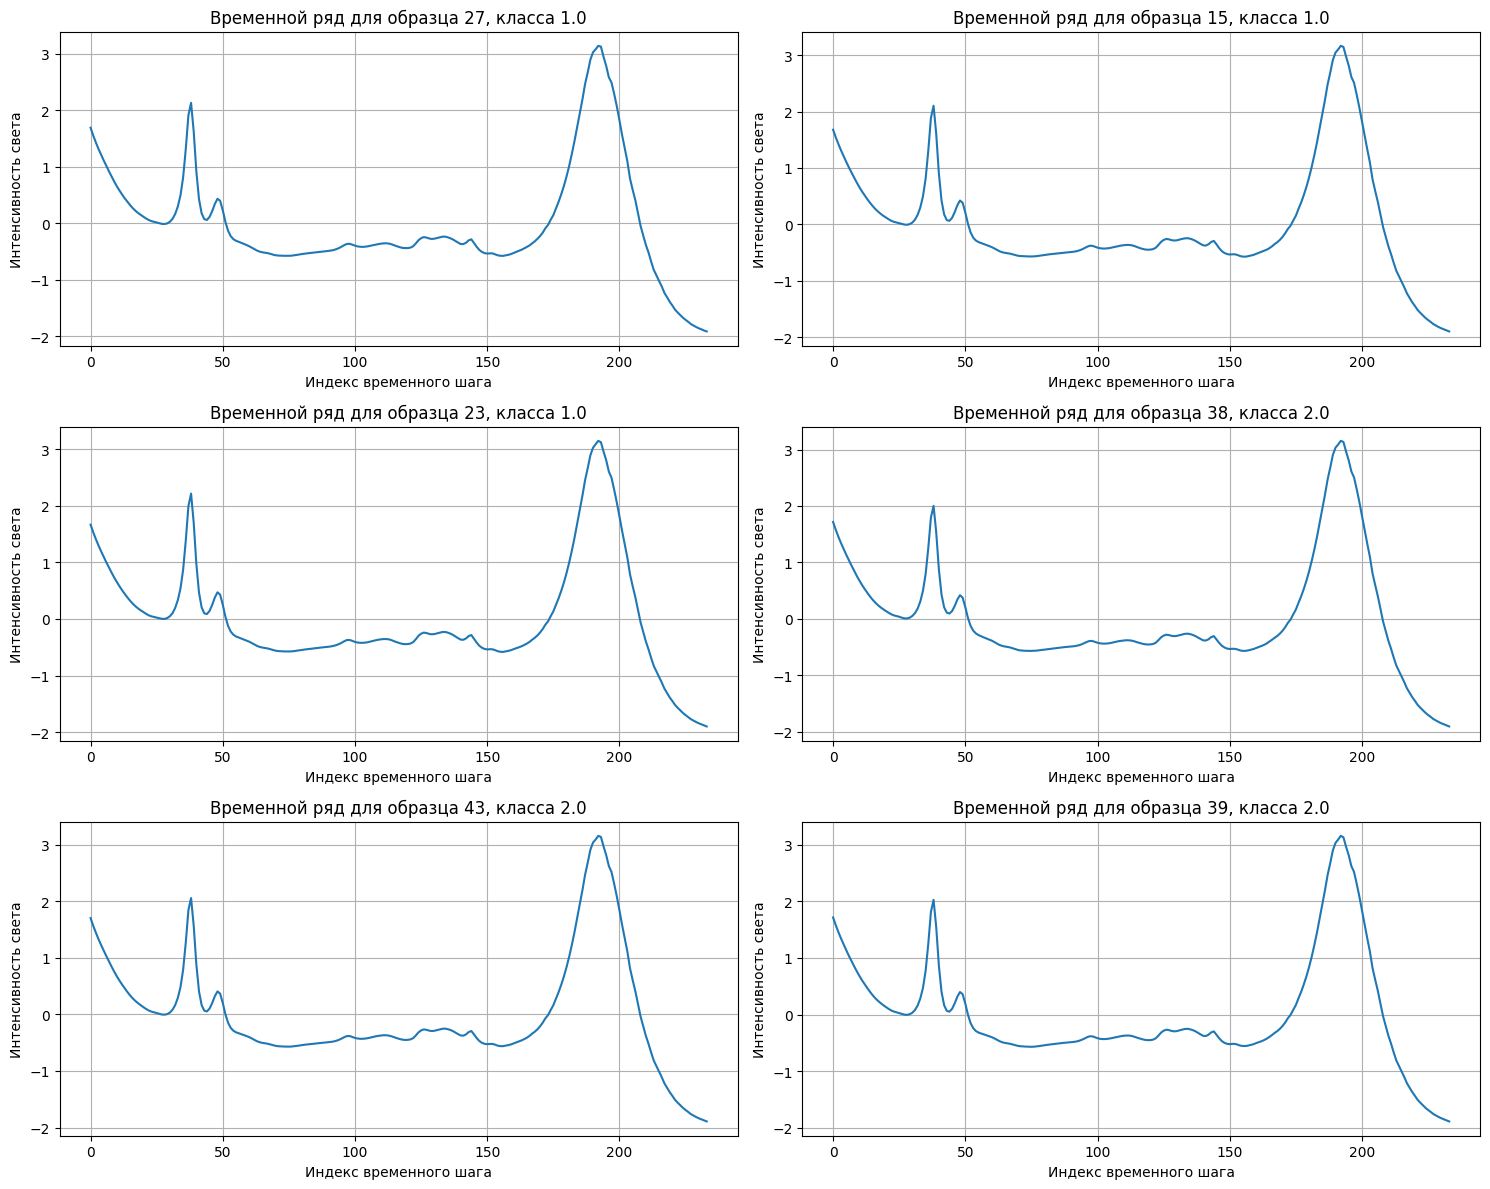

In [24]:
sample_indices_class1 = wine_train[wine_train['target_wine_class'] == 1].sample(min(3, len(wine_train[wine_train['target_wine_class'] == 1])) , random_state=42).index
sample_indices_class2 = wine_train[wine_train['target_wine_class'] == 2].sample(min(3, len(wine_train[wine_train['target_wine_class'] == 2])) , random_state=42).index

sample_indices = sample_indices_class1.tolist() + sample_indices_class2.tolist()

plt.figure(figsize=(15, 12))
for i, idx in enumerate(sample_indices):
    row_data = wine_train.loc[idx]
    target_class = row_data['target_wine_class']

    spectrogram_values = row_data.drop('target_wine_class').values

    plt.subplot(len(sample_indices)//2 + len(sample_indices)%2, 2, i + 1)
    plt.plot(spectrogram_values, label=f'Class {target_class}')
    plt.title(f'Временной ряд для образца {idx}, класса {target_class}')
    plt.xlabel('Индекс временного шага')
    plt.ylabel('Интенсивность света')
    plt.grid(True)
plt.tight_layout()
plt.show()

In [41]:
feature_columns = [col for col in wine_train.columns if col.startswith('absorption_')]

X_train_raw = wine_train[feature_columns]
y_train = wine_train['target_wine_class']

X_test_raw = wine_test[feature_columns]
y_test = wine_test['target_wine_class']


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_raw)
X_test_scaled = scaler.transform(X_test_raw)


model = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced')

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=kf, scoring='accuracy')
print(f"\nОценки кросс-валидации (Accuracy) на сырых признаках: {cv_scores}")
print(f"Средняя Accuracy по кросс-валидации: {np.mean(cv_scores):.4f}")



Оценки кросс-валидации (Accuracy) на сырых признаках: [0.75       0.83333333 0.81818182 0.72727273 0.90909091]
Средняя Accuracy по кросс-валидации: 0.8076


In [42]:
model.fit(X_train_scaled, y_train)
y_pred_test = model.predict(X_test_scaled)


print("\n--- Результаты оценки на тестовом наборе ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_test):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))


--- Результаты оценки на тестовом наборе ---
Accuracy: 0.7407

Classification Report:
              precision    recall  f1-score   support

           1       0.71      0.81      0.76        27
           2       0.78      0.67      0.72        27

    accuracy                           0.74        54
   macro avg       0.75      0.74      0.74        54
weighted avg       0.75      0.74      0.74        54


Confusion Matrix:
[[22  5]
 [ 9 18]]


## Изучим датасет с йогой

In [27]:
yoga_train.head()

,target_yoga_class,absorption_1,absorption_2,absorption_3,absorption_4,absorption_5,absorption_6,absorption_7,absorption_8,absorption_9,...,absorption_417,absorption_418,absorption_419,absorption_420,absorption_421,absorption_422,absorption_423,absorption_424,absorption_425,absorption_426
0,1,-0.074815,-0.099987,-0.12415,-0.14727,-0.16934,-0.19031,-0.21018,-0.22890,-0.24646,...,-0.24712,-0.22248,-0.21588,-0.19327,-0.14695,-0.10947,-0.095929,-0.080018,-0.061776,-0.061776
1,1,0.967690,0.955940,0.94516,0.87896,0.86663,0.85866,0.85172,0.84579,0.84090,...,0.75879,0.81326,0.86449,0.89717,0.93158,0.96224,0.947720,0.983310,0.966560,0.966560
2,2,0.960920,0.928330,0.89653,0.86557,0.83554,0.80644,0.77847,0.75142,0.72531,...,1.25130,1.21390,1.21600,1.22380,1.20910,1.16900,1.129700,1.091000,1.053100,1.029800
3,2,1.908200,1.870500,1.83370,1.79780,1.76290,1.72910,1.69640,1.63020,1.55850,...,1.80560,1.86160,1.88460,1.92150,1.95580,1.96770,1.982100,1.983100,1.953000,1.962700
4,1,2.016700,1.986400,1.95650,1.92720,1.89880,1.87080,1.84360,1.81720,1.79120,...,1.77030,1.82520,1.88040,1.90540,1.93240,1.98900,2.021300,2.035500,2.000300,2.000300


In [28]:
yoga_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Columns: 427 entries, target_yoga_class to absorption_426
dtypes: float64(426), int64(1)
memory usage: 1000.9 KB


In [29]:
num_cols_yoga = yoga_train.shape[1]

column_names = ['target_yoga_class']


for i in range(1, num_cols_yoga):
    column_names.append(f'absorption_{i}')


yoga_train.columns = column_names
yoga_test.columns = column_names

In [30]:
yoga_train.describe()

,target_yoga_class,absorption_1,absorption_2,absorption_3,absorption_4,absorption_5,absorption_6,absorption_7,absorption_8,absorption_9,...,absorption_417,absorption_418,absorption_419,absorption_420,absorption_421,absorption_422,absorption_423,absorption_424,absorption_425,absorption_426
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,...,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,1.543333,1.050234,1.046237,1.045306,1.043349,1.041034,1.038523,1.035027,1.030098,1.025449,...,0.717449,0.752645,0.787597,0.821279,0.851493,0.879949,0.906319,0.931778,0.954157,0.966125
std,0.498951,0.685446,0.680221,0.675728,0.672514,0.669307,0.664451,0.660469,0.656486,0.649777,...,0.723763,0.722765,0.720253,0.715228,0.712381,0.709772,0.706909,0.703159,0.699747,0.701101
min,1.000000,-0.734620,-0.751970,-0.768020,-0.782720,-0.795880,-0.807540,-0.817680,-0.855550,-0.887620,...,-1.099100,-1.061900,-1.024300,-0.971110,-0.911950,-0.871660,-0.848510,-0.824320,-0.791980,-0.791980
25%,1.000000,0.756618,0.771962,0.771228,0.772838,0.768205,0.743305,0.722535,0.704400,0.687472,...,0.239765,0.281787,0.328525,0.385930,0.435975,0.475420,0.528795,0.570500,0.594455,0.616205
50%,2.000000,1.173950,1.161100,1.177450,1.194850,1.211800,1.232400,1.211900,1.202600,1.188400,...,0.672455,0.715580,0.757445,0.806225,0.867230,0.916690,0.944685,0.987825,1.014200,1.029900
75%,2.000000,1.556375,1.553125,1.550100,1.545450,1.539175,1.531700,1.526975,1.516425,1.507375,...,1.375150,1.404975,1.415475,1.435525,1.453775,1.478975,1.490450,1.500450,1.514225,1.516025
max,2.000000,2.151600,2.171500,2.198400,2.225600,2.222000,2.204800,2.169800,2.160600,2.158300,...,2.058700,2.114500,2.155900,2.178900,2.204000,2.189700,2.155300,2.121600,2.141200,2.141200


In [31]:
yoga_train.isna().sum().sum()

np.int64(0)

In [32]:
df_mean_absorption_by_class = yoga_train.groupby('target_yoga_class')[[col for col in yoga_train.columns if col.startswith('absorption_')]].mean()
print("\n--- Средние значения спектрограммы по классам ---")
print(df_mean_absorption_by_class)


--- Средние значения спектрограммы по классам ---
                   absorption_1  absorption_2  absorption_3  absorption_4  \
target_yoga_class                                                           
1                      1.123213      1.118825      1.119404      1.118631   
2                      0.988897      0.985227      0.983027      0.980075   

                   absorption_5  absorption_6  absorption_7  absorption_8  \
target_yoga_class                                                           
1                      1.117063      1.113467      1.109156      1.102939   
2                      0.977132      0.975534      0.972721      0.968875   

                   absorption_9  absorption_10  ...  absorption_417  \
target_yoga_class                               ...                   
1                      1.096020       1.087450  ...        0.759185   
2                      0.966135       0.963885  ...        0.682370   

                   absorption_418  absorption_

In [33]:
df_std_absorption_by_class = yoga_train.groupby('target_yoga_class')[[col for col in yoga_train.columns if col.startswith('absorption_')]].std()
print("\n--- Стандартное отклонение спектрограммы по классам ---")
print(df_std_absorption_by_class)


--- Стандартное отклонение спектрограммы по классам ---
                   absorption_1  absorption_2  absorption_3  absorption_4  \
target_yoga_class                                                           
1                      0.669171      0.666207      0.663831      0.661294   
2                      0.694950      0.687892      0.681366      0.677356   

                   absorption_5  absorption_6  absorption_7  absorption_8  \
target_yoga_class                                                           
1                      0.657257      0.653448      0.647327      0.641365   
2                      0.674654      0.669069      0.666924      0.664719   

                   absorption_9  absorption_10  ...  absorption_417  \
target_yoga_class                               ...                   
1                      0.632597       0.622050  ...        0.705390   
2                      0.659969       0.658231  ...        0.739189   

                   absorption_418  absor

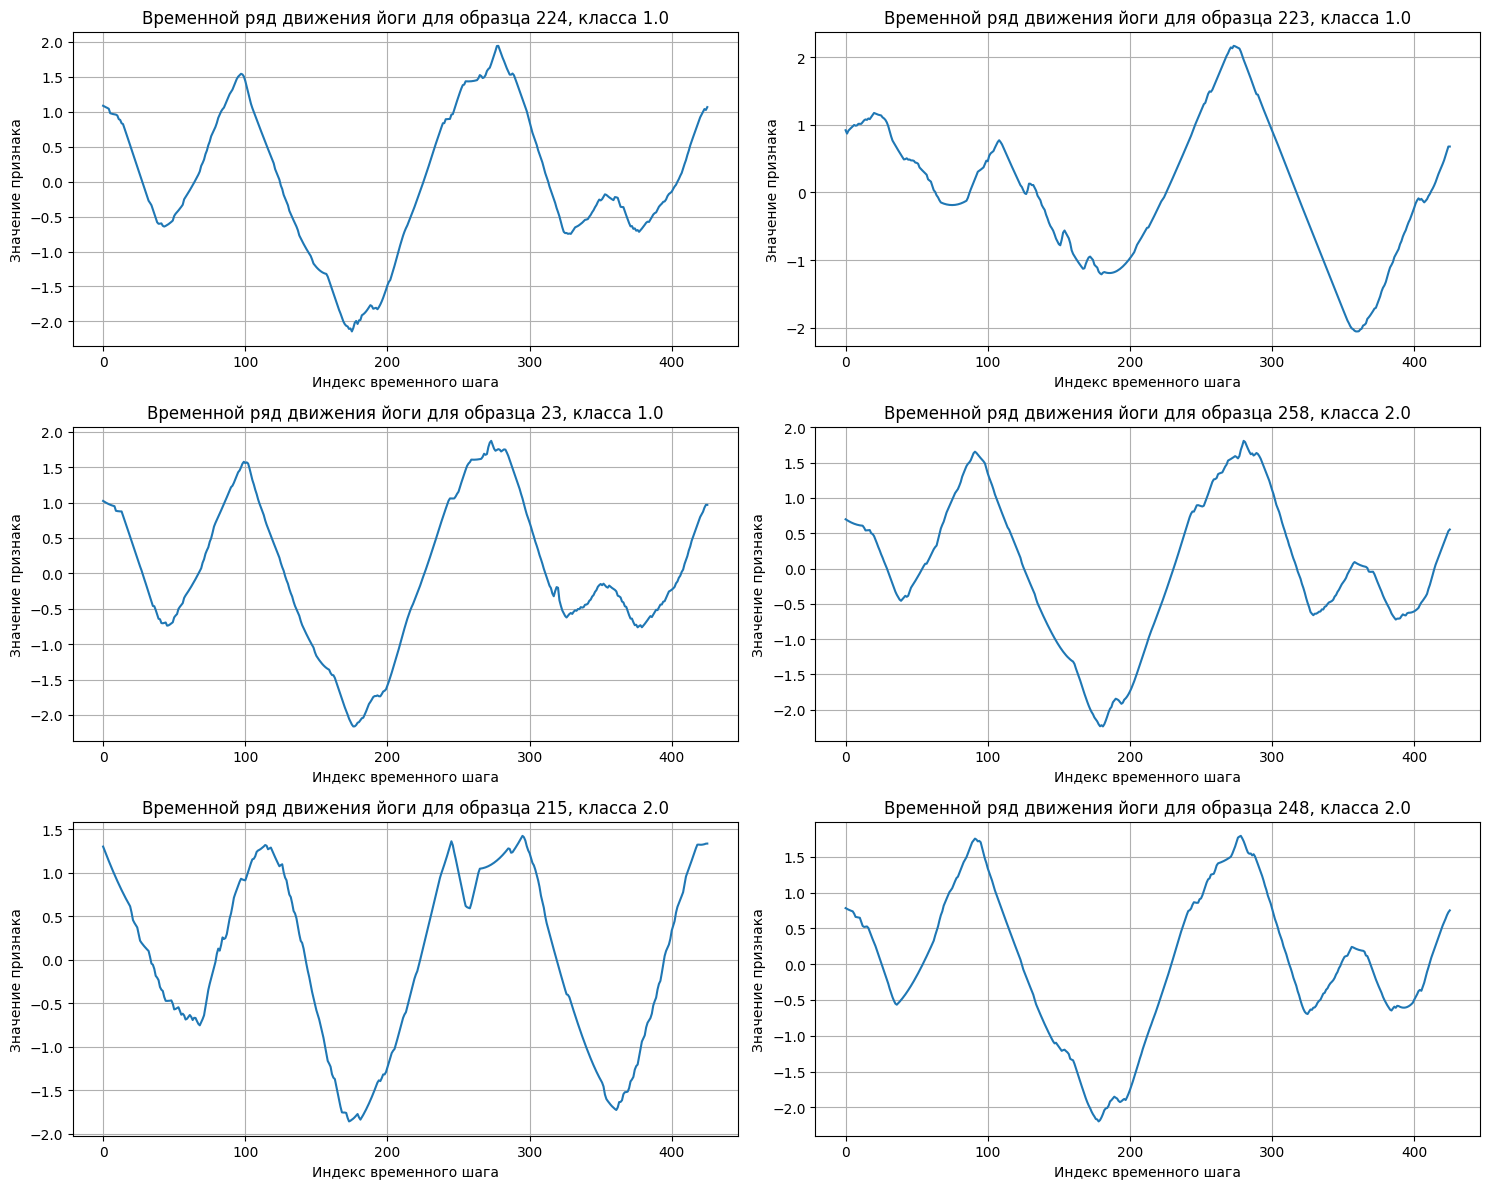

In [34]:
sample_indices_class1 = yoga_train[yoga_train['target_yoga_class'] == 1].sample(min(3, len(yoga_train[yoga_train['target_yoga_class'] == 1])) , random_state=42).index
sample_indices_class2 = yoga_train[yoga_train['target_yoga_class'] == 2].sample(min(3, len(yoga_train[yoga_train['target_yoga_class'] == 2])) , random_state=42).index

sample_indices = sample_indices_class1.tolist() + sample_indices_class2.tolist()

plt.figure(figsize=(15, 12))
for i, idx in enumerate(sample_indices):
    row_data = yoga_train.loc[idx]
    target_class = row_data['target_yoga_class']

    spectrogram_values = row_data.drop('target_yoga_class').values

    plt.subplot(len(sample_indices)//2 + len(sample_indices)%2, 2, i + 1)
    plt.plot(spectrogram_values, label=f'Class {target_class}')
    plt.title(f'Временной ряд движения йоги для образца {idx}, класса {target_class}')
    plt.xlabel('Индекс временного шага')
    plt.ylabel('Значение признака')
    plt.grid(True)
plt.tight_layout()
plt.show()

In [43]:
feature_columns = [col for col in wine_train.columns if col.startswith('absorption_')]

X_train_raw = yoga_train[feature_columns]
y_train = yoga_train['target_yoga_class']

X_test_raw = yoga_test[feature_columns]
y_test = yoga_test['target_yoga_class']


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_raw)
X_test_scaled = scaler.transform(X_test_raw)


model = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced')

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=kf, scoring='accuracy')
print(f"\nОценки кросс-валидации (Accuracy) на сырых признаках: {cv_scores}")
print(f"Средняя Accuracy по кросс-валидации: {np.mean(cv_scores):.4f}")


Оценки кросс-валидации (Accuracy) на сырых признаках: [0.7        0.71666667 0.8        0.76666667 0.8       ]
Средняя Accuracy по кросс-валидации: 0.7567


In [44]:
model.fit(X_train_scaled, y_train)
y_pred_test_yoga = model.predict(X_test_scaled)


print("\n--- Результаты оценки на тестовом наборе ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_test_yoga):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test_yoga))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_test_yoga))


--- Результаты оценки на тестовом наборе ---
Accuracy: 0.7938

Classification Report:
              precision    recall  f1-score   support

           1       0.80      0.73      0.77      1125
           2       0.79      0.85      0.82      1314

    accuracy                           0.79      2439
   macro avg       0.80      0.79      0.79      2439
weighted avg       0.79      0.79      0.79      2439


Confusion Matrix:
[[ 824  301]
 [ 202 1112]]
